## Twitter US Airline Sentiment

## 1 Import the libraries, load dataset, print shape of data, data description.

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Understand of data-columns:

In [6]:
tweetdf=pd.read_csv('Tweets.csv')
print("Shape:",tweetdf.shape)
print("columns:",tweetdf.columns)

Shape: (14640, 15)
columns: Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


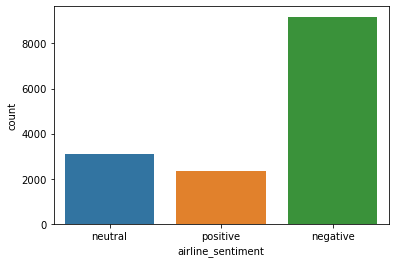

In [7]:
sns.countplot(data=tweetdf, x="airline_sentiment");

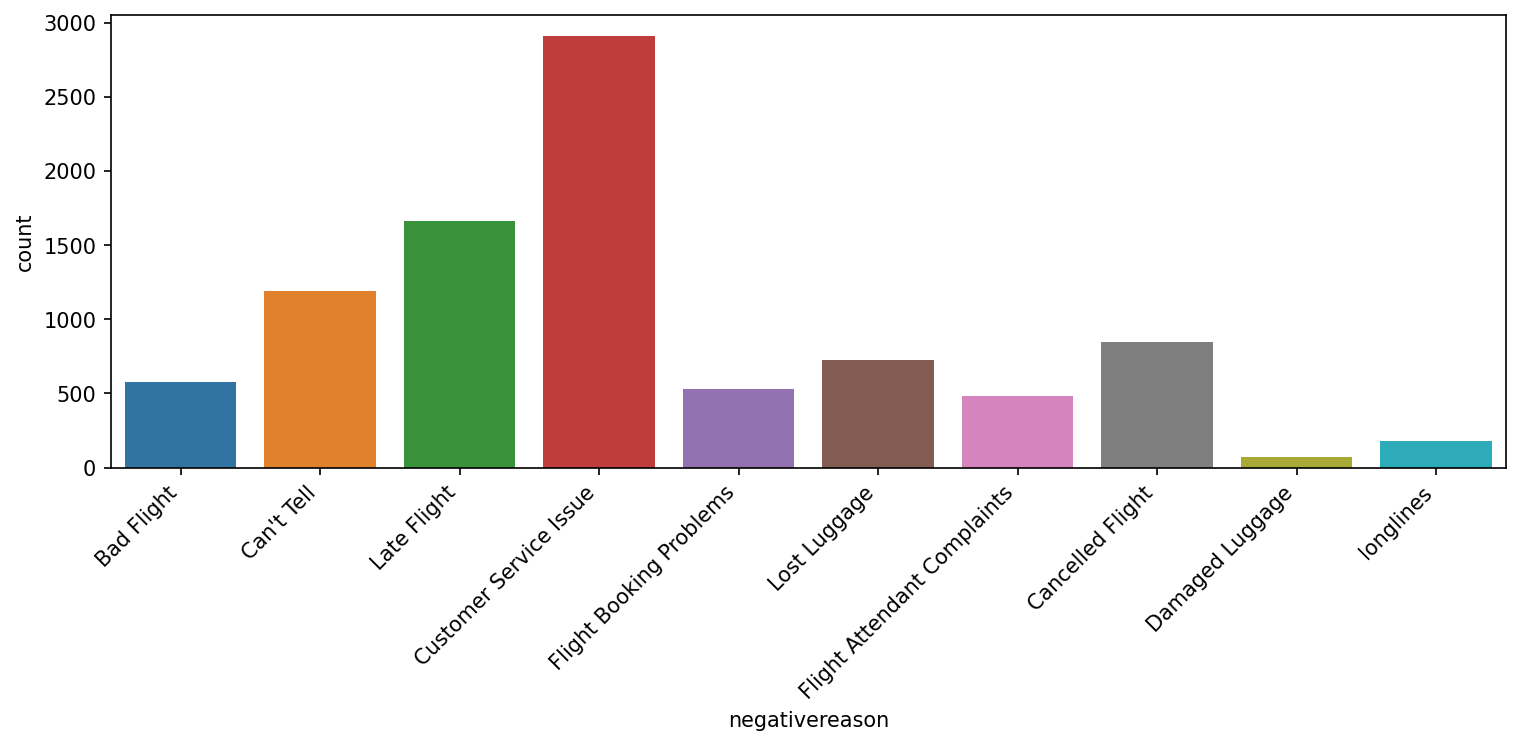

In [8]:
plt.figure(figsize=(12, 4), dpi=150)
sns.countplot(x=tweetdf["negativereason"])
plt.xticks(rotation=45, horizontalalignment="right");

# 2 a. Drop all other columns except “text” and “airline_sentiment”. \

In [9]:
tweetdf = tweetdf.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],axis = 1)

# 2 b. Check the shape of data. \

In [10]:
print("Shape:",tweetdf.shape)
print("columns:",tweetdf.columns)

Shape: (14640, 2)
columns: Index(['airline_sentiment', 'text'], dtype='object')


# 2 c. Print first 5 rows of data.

In [11]:
tweetdf.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# 3. Text pre-processing: Data preparation. (20 Marks)

# 3 a. Html tag removal.

In [12]:
from bs4 import BeautifulSoup
# function to remove HTML tags
def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()

tweetdf['cleaned']=tweetdf['text'].apply(lambda cw : remove_html_tags(cw))
print("Eliminate HTML Tags':")
print(tweetdf.head(5))

Eliminate HTML Tags':
  airline_sentiment                                               text  \
0           neutral                @VirginAmerica What @dhepburn said.   
1          positive  @VirginAmerica plus you've added commercials t...   
2           neutral  @VirginAmerica I didn't today... Must mean I n...   
3          negative  @VirginAmerica it's really aggressive to blast...   
4          negative  @VirginAmerica and it's a really big bad thing...   

                                             cleaned  
0                @VirginAmerica What @dhepburn said.  
1  @VirginAmerica plus you've added commercials t...  
2  @VirginAmerica I didn't today... Must mean I n...  
3  @VirginAmerica it's really aggressive to blast...  
4  @VirginAmerica and it's a really big bad thing...  


# 3 d. Removal of Special Characters and Punctuations.

In [13]:
# imports
import unicodedata
# function to remove accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text
# call function
tweetdf['cleaned']=tweetdf['cleaned'].apply(lambda cw : remove_accented_chars(cw))

In [14]:
print("Eliminate Accents:")
print(tweetdf.head(5))

Eliminate Accents:
  airline_sentiment                                               text  \
0           neutral                @VirginAmerica What @dhepburn said.   
1          positive  @VirginAmerica plus you've added commercials t...   
2           neutral  @VirginAmerica I didn't today... Must mean I n...   
3          negative  @VirginAmerica it's really aggressive to blast...   
4          negative  @VirginAmerica and it's a really big bad thing...   

                                             cleaned  
0                @VirginAmerica What @dhepburn said.  
1  @VirginAmerica plus you've added commercials t...  
2  @VirginAmerica I didn't today... Must mean I n...  
3  @VirginAmerica it's really aggressive to blast...  
4  @VirginAmerica and it's a really big bad thing...  


 # 3 d. Removal of Special Characters and Punctuations.

In [15]:
# imports
import re
# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)
 
# call function
tweetdf['cleaned']=tweetdf['cleaned'].apply(lambda cw : remove_special_characters(cw))

print("Eliminate Special Characters:")
print(tweetdf.head(5))

Eliminate Special Characters:
  airline_sentiment                                               text  \
0           neutral                @VirginAmerica What @dhepburn said.   
1          positive  @VirginAmerica plus you've added commercials t...   
2           neutral  @VirginAmerica I didn't today... Must mean I n...   
3          negative  @VirginAmerica it's really aggressive to blast...   
4          negative  @VirginAmerica and it's a really big bad thing...   

                                             cleaned  
0                  VirginAmerica What dhepburn said.  
1  VirginAmerica plus you've added commercials to...  
2  VirginAmerica I didn't today... Must mean I ne...  
3  VirginAmerica it's really aggressive to blast ...  
4  VirginAmerica and it's a really big bad thing ...  


# 3 c. Remove the numbers.

In [16]:
# imports
import re
# function to remove numbers
def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)
 
# call function
tweetdf['cleaned']=tweetdf['cleaned'].apply(lambda cw : remove_numbers(cw))

print("Eliminate Numbers:")
print(tweetdf.head(5))

Eliminate Numbers:
  airline_sentiment                                               text  \
0           neutral                @VirginAmerica What @dhepburn said.   
1          positive  @VirginAmerica plus you've added commercials t...   
2           neutral  @VirginAmerica I didn't today... Must mean I n...   
3          negative  @VirginAmerica it's really aggressive to blast...   
4          negative  @VirginAmerica and it's a really big bad thing...   

                                             cleaned  
0                  VirginAmerica What dhepburn said.  
1  VirginAmerica plus you've added commercials to...  
2  VirginAmerica I didn't today... Must mean I ne...  
3  VirginAmerica it's really aggressive to blast ...  
4  VirginAmerica and it's a really big bad thing ...  


In [17]:
# imports
import string
# function to remove punctuation
def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text
# call function
tweetdf['cleaned']=tweetdf['cleaned'].apply(lambda cw : remove_punctuation(cw))
print("Eliminate Punctuations:")
print(tweetdf.head(5))

Eliminate Punctuations:
  airline_sentiment                                               text  \
0           neutral                @VirginAmerica What @dhepburn said.   
1          positive  @VirginAmerica plus you've added commercials t...   
2           neutral  @VirginAmerica I didn't today... Must mean I n...   
3          negative  @VirginAmerica it's really aggressive to blast...   
4          negative  @VirginAmerica and it's a really big bad thing...   

                                             cleaned  
0                   VirginAmerica What dhepburn said  
1  VirginAmerica plus youve added commercials to ...  
2  VirginAmerica I didnt today Must mean I need t...  
3  VirginAmerica its really aggressive to blast o...  
4  VirginAmerica and its a really big bad thing a...  


In [18]:
# 3 e. Conversion to lowercase.
tweetdf.loc[:,"cleaned"] = tweetdf.cleaned.apply(lambda x : str.lower(x))
print("Lowercase:")
print(tweetdf.head(5))

Lowercase:
  airline_sentiment                                               text  \
0           neutral                @VirginAmerica What @dhepburn said.   
1          positive  @VirginAmerica plus you've added commercials t...   
2           neutral  @VirginAmerica I didn't today... Must mean I n...   
3          negative  @VirginAmerica it's really aggressive to blast...   
4          negative  @VirginAmerica and it's a really big bad thing...   

                                             cleaned  
0                   virginamerica what dhepburn said  
1  virginamerica plus youve added commercials to ...  
2  virginamerica i didnt today must mean i need t...  
3  virginamerica its really aggressive to blast o...  
4  virginamerica and its a really big bad thing a...  


# 3 b. Tokenization.

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#print(stop_words)

[nltk_data] Downloading package stopwords to /Users/MAJA/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:

for i in range(len(tweetdf['cleaned'])):
    row=nltk.word_tokenize(tweetdf['cleaned'][i])
    new = []
    for word in row:
        if word not in stopwords.words('english'):
            new.append(word)
            tweetdf['cleaned'][i]=' '.join(new)

In [21]:
print("Eliminate Stopwords:")
print(tweetdf.head(5))

Eliminate Stopwords:
  airline_sentiment                                               text  \
0           neutral                @VirginAmerica What @dhepburn said.   
1          positive  @VirginAmerica plus you've added commercials t...   
2           neutral  @VirginAmerica I didn't today... Must mean I n...   
3          negative  @VirginAmerica it's really aggressive to blast...   
4          negative  @VirginAmerica and it's a really big bad thing...   

                                             cleaned  
0                        virginamerica dhepburn said  
1  virginamerica plus youve added commercials exp...  
2  virginamerica didnt today must mean need take ...  
3  virginamerica really aggressive blast obnoxiou...  
4                 virginamerica really big bad thing  


In [ ]:
#import nltk
#nltk.download('wordnet')

# 3 f. Lemmatize ,Join and  Print first 5 rows of data after pre-processing.

In [22]:
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()
for i in range(len(tweetdf['cleaned'])):
    words = nltk.word_tokenize(tweetdf['cleaned'][i])
    words = [lem.lemmatize(word,pos='v') for word in words]
    tweetdf['cleaned'][i] = ' '.join(words)

print("Lemmatize:")
print(tweetdf.head(5));

Lemmatize:
  airline_sentiment                                               text  \
0           neutral                @VirginAmerica What @dhepburn said.   
1          positive  @VirginAmerica plus you've added commercials t...   
2           neutral  @VirginAmerica I didn't today... Must mean I n...   
3          negative  @VirginAmerica it's really aggressive to blast...   
4          negative  @VirginAmerica and it's a really big bad thing...   

                                             cleaned  
0                         virginamerica dhepburn say  
1  virginamerica plus youve add commercials exper...  
2  virginamerica didnt today must mean need take ...  
3  virginamerica really aggressive blast obnoxiou...  
4                 virginamerica really big bad thing  


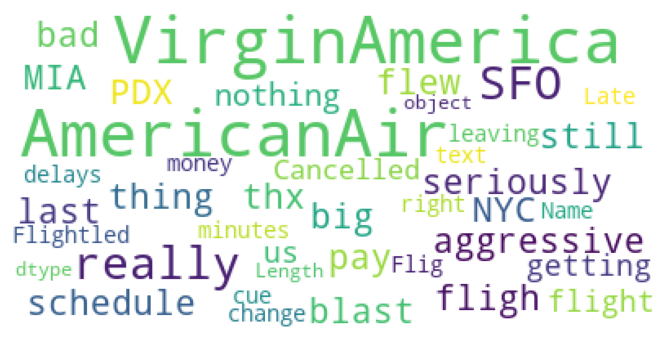

In [51]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(tweetdf[tweetdf["airline_sentiment"]=="negative"]["text"]))

fig = plt.figure(figsize=(14,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

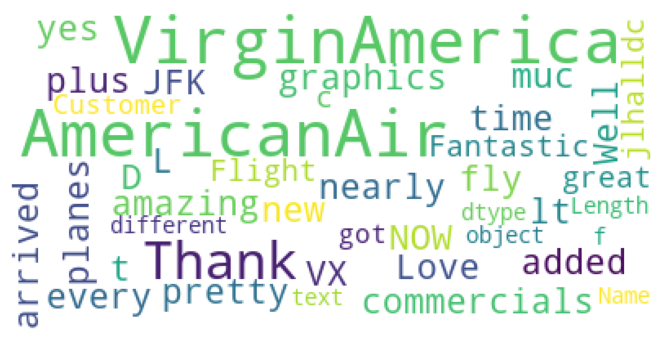

In [52]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(tweetdf[tweetdf["airline_sentiment"]=="positive"]["text"]))

fig = plt.figure(figsize=(14,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

# 4. Vectorization: 

In [23]:
phrase = np.array(tweetdf['cleaned'])
sentiments = np.array(tweetdf['airline_sentiment'])
# build train and test datasets

from sklearn.model_selection import train_test_split    
phrase_train, phrase_test, sentiments_train, sentiments_test = train_test_split(phrase, sentiments, test_size=0.2, random_state=4)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# 4 a. Use CountVectorizer.

In [27]:
## Build Bag-Of-Words on train phrases
cv = CountVectorizer(stop_words='english',max_features=10000)
cv_train_features = cv.fit_transform(phrase_train)

# 4 b. Use TfidfVectorizer.

In [28]:
# build TFIDF features on train reviews
tv = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(phrase_train)

In [29]:
# transform test reviews into features
cv_test_features = cv.transform(phrase_test)
tv_test_features = tv.transform(phrase_test)

In [30]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (11712, 10000)  Test features shape: (2928, 10000)
TFIDF model:> Train features shape: (11712, 78786)  Test features shape: (2928, 78786)


# 5. Fit and evaluate model using both type of vectorization.

# 2.3.1 Logistic Regression model on CountVectorizer

In [31]:
# Logistic Regression model on BOW features
#lr_bow_predictions = train_predict_model(classifier=lr,train_features=cv_train_features, train_labels=sentiments_train,
#                                             test_features=cv_test_features, test_labels=sentiments_test)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(penalty='l2', max_iter=200, C=1)
# build model    
lr.fit(cv_train_features, sentiments_train)

# predict using model
predictions = lr.predict(cv_test_features) 
    

def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    

def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=level_labels), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=level_labels)) 
    print(cm_frame) 
    
print('Model Performance metrics:')
get_metrics(true_labels=sentiments_test, predicted_labels=predictions)

Model Performance metrics:
Accuracy: 0.7811
Precision: 0.7752
Recall: 0.7811
F1 Score: 0.7769


# 2.3.2 Logistic Regression model on TfidfVectorizer

In [32]:
def train_predict_model(classifier, 
                        train_features, train_labels, 
                        test_features, test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions    

 
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))

def display_model_performance_metrics(true_labels, predicted_labels, classes=[1,0]):
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)

# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = train_predict_model(classifier=lr, 
                                               train_features=tv_train_features, train_labels=sentiments_train,
                                               test_features=tv_test_features, test_labels=sentiments_test)
display_model_performance_metrics(true_labels=sentiments_test, predicted_labels=lr_tfidf_predictions,
                                      classes=[0,1,2,3,4])



Model Performance metrics:
------------------------------
Accuracy: 0.7807
Precision: 0.7727
Recall: 0.7807
F1 Score: 0.7635


# Summary:

In this twitter sentiment analysis dataset. I have used the necessary techniques to clean up data.
Preprocessing includes removing html tags, punctuations,spl characters and whitespaces.Modified all text to lowercase
Tokenization helps braking the sentnece into indivuduals and lemming brings it down to its root form.
Stopwords elimination helps remove pre defined stop words in english language.

Applyin vectorization techqniques ( TF-IDF & CountVectorizer) to map words to numbers.
Logistic Regression on TF-IDF is outperforming other machine learning algorithms.